This notebok is to perform a extreme-point-density analysis using the theory developed by Yongxiang HUANG et al.

PHYSICAL REVIEW E 96, 012215 (2017) Extremal-point density of scaling processes: From fractional Brownian motion to turbulence in one dimension.

The extremal point is defined as $x_{i-1}<x_i<x_{i+1}$ or vice verse. 

Considering a coarse grain of the time series $x(t)$ with a window size $\tau$, the extremal point then satisfies,
$$x[t-\tau]<x[t] \quad\& \quad x[t+1-\tau]>x[t+1]$$

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numba
import time
import datetime
import numpy as np


@numba.njit(fastmath=True)# define the EPD function
def EPD_1d(x,Tau,Nx,NTau):
    EPD=np.full((Nx,NTau),False)
    for i in range(NTau):
        for j in range(1+Tau[i],Nx-Tau[i]-1):
            if ((x[j-Tau[i]]<x[j]) & (x[j+1-Tau[i]]>x[j+1])) |((x[j-Tau[i]]>x[j]) & (x[j+1-Tau[i]]<x[j+1])):
                    EPD[j,i]=True
    return EPD

print('Finish define function:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Finish define function: 2021-02-04 21:53:10


The Python version EPD code has been verified with the Matlab one. They provide the same results.

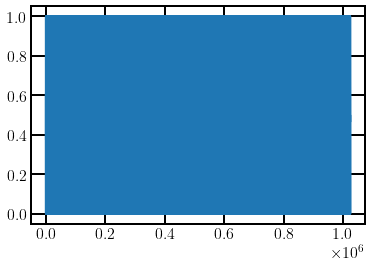

In [6]:
Nx=1024000
x=np.random.random(Nx)
Nx=np.size(x)
plt.plot(x)

In [10]:
Nx=np.size(x)
Tau=np.arange(1,101)
NTau=np.size(Tau)

t0=time.time()
EPD=EPD_1d(x,Tau,Nx,NTau)
t=time.time()-t0
print('Total time: {:.2f}'.format(t),' second.')

Total time: 1.04  second.


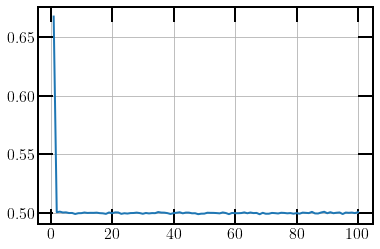

In [9]:
plt.plot(Tau,np.mean(EPD,axis=0)*Nx/(Nx-Tau),'-',mfc='none',ms=10)